In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from libs.ds_charts import plot_evaluation_results, bar_chart
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, f1_score

In [2]:
### FILES
file_tag_zscore = 'air_quality_scaled_zscore'
filename_zscore = 'data/air_quality_scaled_zscore'

file_tag_minmax = 'air_quality_scaled_minmax'
filename_minmax = 'data/air_quality_scaled_minmax'

target = 'ALARM'

0.5671522650169627


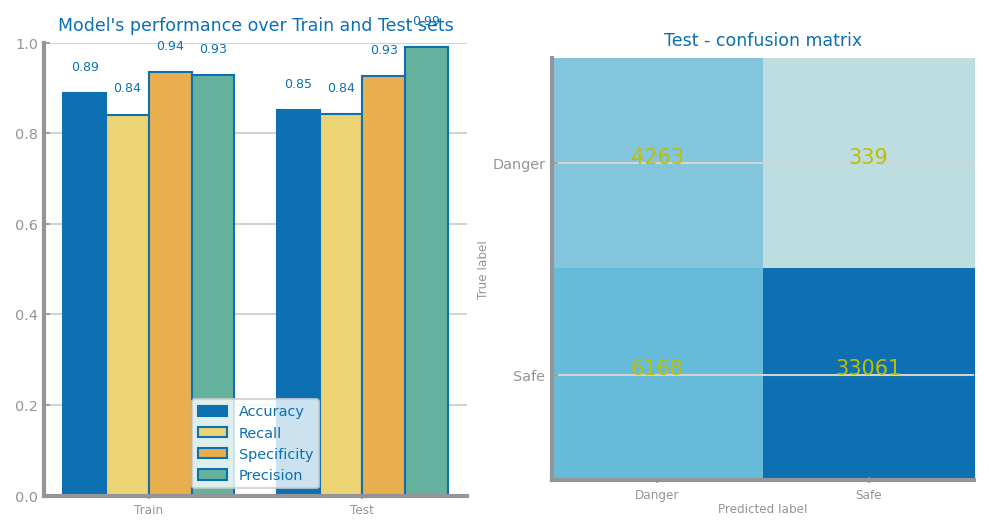

In [24]:
#PREPARE TRAIN AND TEST SZCORE
train_zscore: DataFrame = read_csv(f'{filename_zscore}_train_smote.csv')
test_zscore: DataFrame = read_csv(f'{filename_zscore}_test.csv')

#train_zscore.drop(['City_EN','Prov_EN','date'], axis=1, inplace=True)
#test_zscore.drop(['City_EN','Prov_EN','date'],axis=1, inplace=True)

trnY_zscore: np.ndarray = train_zscore.pop(target).values
trnX_zscore: np.ndarray = train_zscore.values
labels = unique(trnY_zscore)
labels.sort()

tstY_zscore: np.ndarray = test_zscore.pop(target).values
tstX_zscore: np.ndarray = test_zscore.values

clf = BernoulliNB()
clf.fit(trnX_zscore, trnY_zscore)
prd_trn = clf.predict(trnX_zscore)
prd_tst = clf.predict(tstX_zscore)
print(f1_score(tstY_zscore, prd_tst, pos_label='Danger'))
plot_evaluation_results(labels, trnY_zscore, prd_trn, tstY_zscore, prd_tst)
savefig('lab4_imagens/{file_tag}_nb_best_zscore.png')
show()

0.4104092384652227


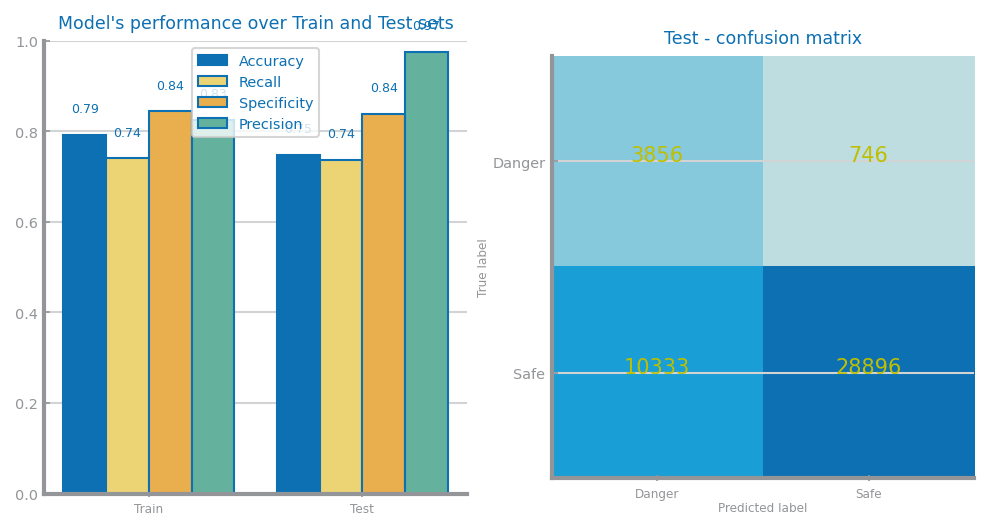

In [25]:
#PREPARE TRAIN AND TEST MINMAX
train_minmax: DataFrame = read_csv(f'{filename_minmax}_train_smote.csv')
test_minmax: DataFrame = read_csv(f'{filename_minmax}_test.csv')
trnY_minmax: np.ndarray = train_minmax.pop(target).values
trnX_minmax: np.ndarray = train_minmax.values
labels = unique(trnY_minmax)
labels.sort()

tstY_minmax: np.ndarray = test_minmax.pop(target).values
tstX_minmax: np.ndarray = test_minmax.values

clf = BernoulliNB()
clf.fit(trnX_minmax, trnY_minmax)
prd_trn = clf.predict(trnX_minmax)
prd_tst = clf.predict(tstX_minmax)
print(f1_score(tstY_minmax, prd_tst, pos_label='Danger'))
plot_evaluation_results(labels, trnY_minmax, prd_trn, tstY_minmax, prd_tst)
savefig(f'lab4_imagens/{file_tag_minmax}_nb_best_minmax_smote.png')
show()


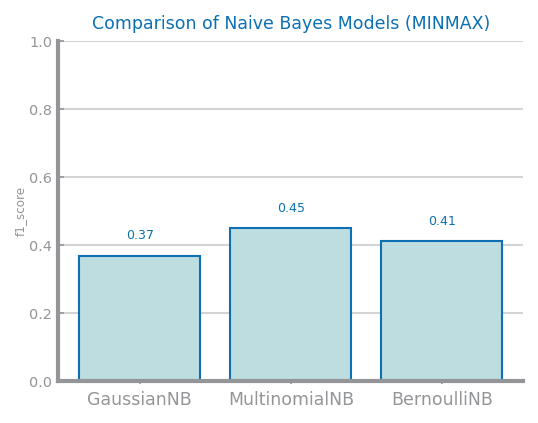

In [17]:
#MINMAX STUDY
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX_minmax, trnY_minmax)
    prdY = estimators[clf].predict(tstX_minmax)
    yvalues.append(f1_score(tstY_minmax, prdY,pos_label="Danger"))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (MINMAX)', ylabel='f1_score', percentage=True)
savefig(f'lab4_imagens/{file_tag_minmax}_nb_study_minmax_f1_smote.png')
show()

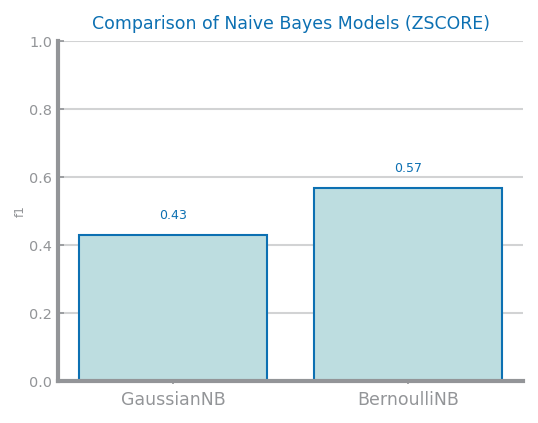

In [20]:
#ZSCORE STUDY
estimators = {'GaussianNB': GaussianNB(),
              'BernoulliNB': BernoulliNB()
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX_zscore, trnY_zscore)
    prdY = estimators[clf].predict(tstX_zscore)
    yvalues.append(f1_score(tstY_zscore, prdY, pos_label="Danger"))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (ZSCORE)', ylabel='f1', percentage=True)
savefig(f'lab4_imagens/{file_tag_zscore}_nb_study_f1_minmax.png')
show()

### KNN ZSCORE

In [26]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

clf = knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
clf.fit(trnX_zscore, trnY_zscore)
prd_trn = clf.predict(trnX_zscore)
prd_tst = clf.predict(tstX_zscore)

print(f1_score(tstY_zscore, prd_tst, pos_label='Danger'))

0.8542150038669761


### KNN MINMAX

In [ ]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

clf = knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
clf.fit(trnX_minmax, trnY_minmax)
prd_trn = clf.predict(trnX_minmax)
prd_tst = clf.predict(tstX_minmax)

print(f1_score(tstY_minmax, prd_tst, pos_label='Danger'))